In [1]:
import seaborn as sns
sns.set(style="darkgrid")  

In [2]:
tips = sns.load_dataset("tips")

In [16]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [18]:
tips.shape

(244, 7)

In [20]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
cols = tips.columns
cols

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [15]:
for i in range(0,len(cols)):
    print('Description of tips column ' + cols[i] + ':')
    print(tips[cols[i]].describe())


Description of tips column total_bill:
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64
Description of tips column tip:
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64
Description of tips column sex:
count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object
Description of tips column smoker:
count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object
Description of tips column day:
count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object
Description of tips column time:
count        244
unique         2
top       Dinner
freq         176
Name: time, dtype: object
Description of tips column size:
count    244.000000
mean       2.569672
s

In [95]:
sittings = tips.time.unique()
sittings

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

In [97]:
days_open = tips.day.unique()
days_open

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [99]:
sexes = tips.sex.unique()
sexes

[Female, Male]
Categories (2, object): [Female, Male]

In [102]:
tips['size'].min()

1

In [103]:
tips['size'].max()

6

In [104]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [28]:
tips.tip.max()

10.0

In [29]:
tips.tip.min()

1.0

In [30]:
tips.total_bill.min()

3.07

In [31]:
tips.total_bill.max()

50.81

In [32]:
# Total tips as a % of all bills
(tips.tip.sum()/tips.total_bill.sum())*100

15.153580224410025

In [33]:
# Make a new column with % of tip/bill size
tips['Tipped Percent'] = (tips.tip/tips.total_bill)*100

In [38]:
tips['Tipped Percent'].describe()

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: Tipped Percent, dtype: float64

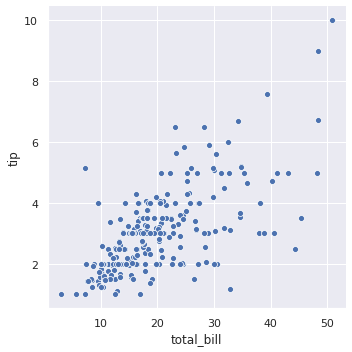

In [39]:
sns.relplot(x="total_bill", y="tip", data=tips);

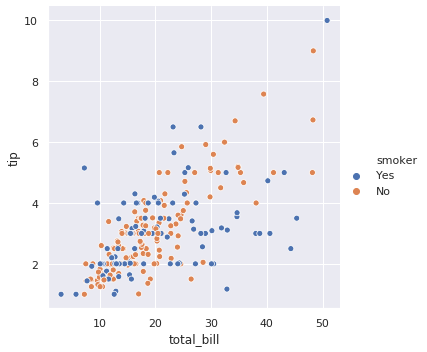

In [40]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

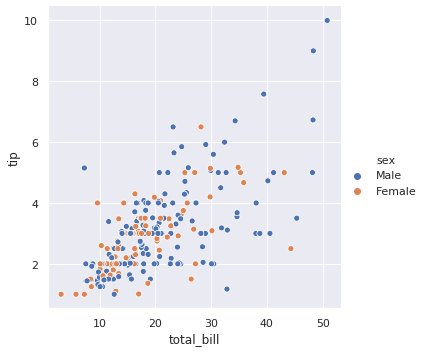

In [41]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips);

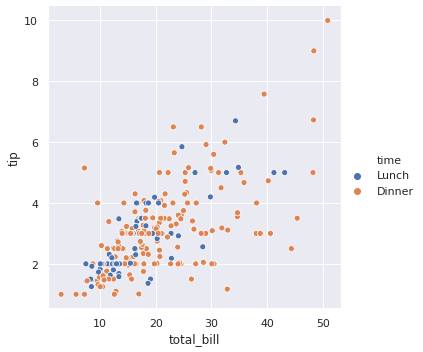

In [42]:
sns.relplot(x="total_bill", y="tip", hue="time", data=tips);

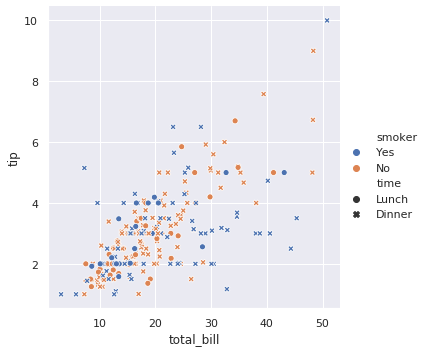

In [43]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

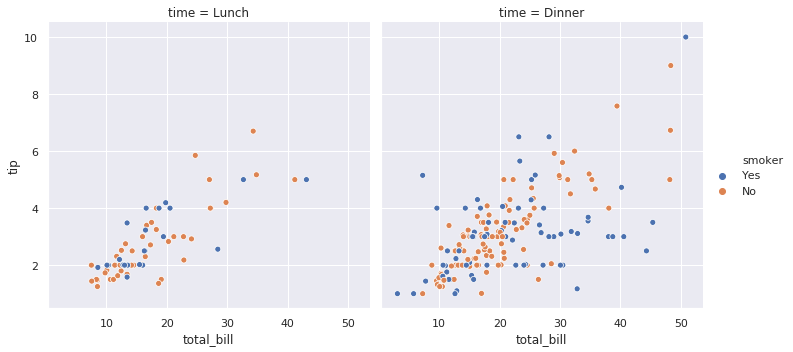

In [44]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

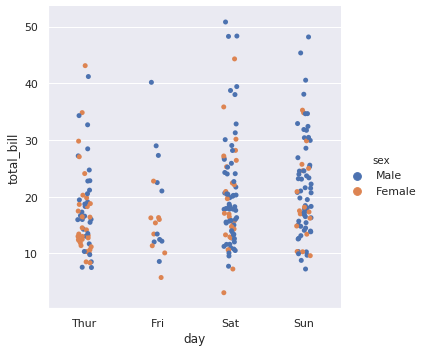

In [53]:
sns.catplot(x="day", y="total_bill",hue="sex", data=tips);

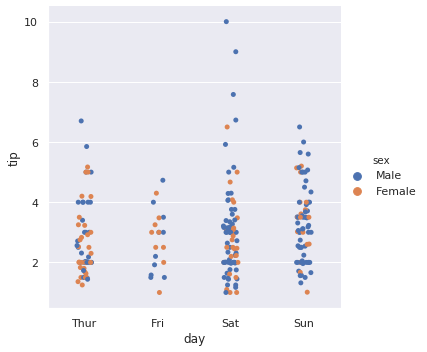

In [52]:
sns.catplot(x="day", y="tip",hue="sex", data=tips);

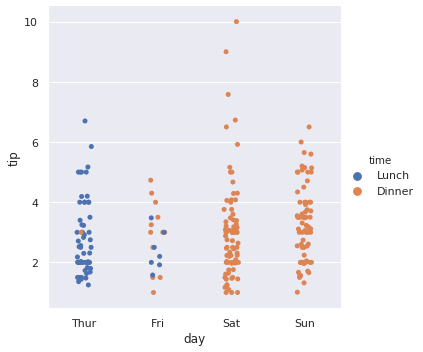

In [54]:
sns.catplot(x="day", y="tip",hue="time", data=tips);

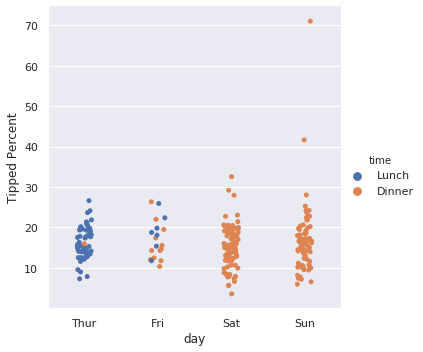

In [105]:
sns.catplot(x="day", y="Tipped Percent",hue="time", data=tips);

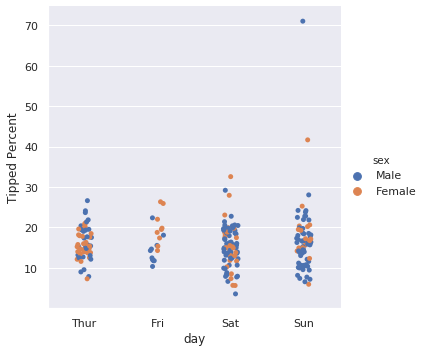

In [106]:
sns.catplot(x="day", y="Tipped Percent",hue="sex", data=tips);

## Grouped by Sittings

In [62]:
thursday = tips[tips.day == 'Thur']
thursday_lunch = thursday[thursday.time == 'Lunch']
thursday_dinner = thursday[thursday.time == 'Dinner']
friday = tips[tips.day == 'Fri']
friday_lunch = friday[friday.time == 'Lunch']
friday_dinner = friday[friday.time == 'Dinner']
saturday = tips[tips.day == 'Sat']
saturday_lunch = saturday[saturday.time == 'Lunch']
satuday_dinner = saturday[saturday.time == 'Dinner']
sunday = tips[tips.day == 'Sun']
sunday_lunch = sunday[sunday.time == 'Lunch']
sunday_dinner = sunday[sunday.time == 'Dinner']